<a href="https://colab.research.google.com/github/Vedprakash123git/pytorch-tutorial-codemy/blob/main/AssignmentCV_23b4231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1/5], Step [100/938], Loss: 0.3482
Epoch [1/5], Step [200/938], Loss: 0.5122
Epoch [1/5], Step [300/938], Loss: 0.2003
Epoch [1/5], Step [400/938], Loss: 0.3340
Epoch [1/5], Step [500/938], Loss: 0.1193
Epoch [1/5], Step [600/938], Loss: 0.1894
Epoch [1/5], Step [700/938], Loss: 0.1536
Epoch [1/5], Step [800/938], Loss: 0.1925
Epoch [1/5], Step [900/938], Loss: 0.2409
Epoch [2/5], Step [100/938], Loss: 0.1869
Epoch [2/5], Step [200/938], Loss: 0.2183
Epoch [2/5], Step [300/938], Loss: 0.2105
Epoch [2/5], Step [400/938], Loss: 0.3053
Epoch [2/5], Step [500/938], Loss: 0.2321
Epoch [2/5], Step [600/938], Loss: 0.0588
Epoch [2/5], Step [700/938], Loss: 0.1753
Epoch [2/5], Step [800/938], Loss: 0.1509
Epoch [2/5], Step [900/938], Loss: 0.1542
Epoch [3/5], Step [100/938], Loss: 0.0747
Epoch [3/5], Step [200/938], Loss: 0.2360
Epoch [3/5], Step [300/938], Loss: 0.1766
Epoch [3/5], Step [400/938], Loss: 0.1376
Epoch [3/5], Step [500/938], Loss: 0.0724
Epoch [3/5], Step [600/938], Loss:

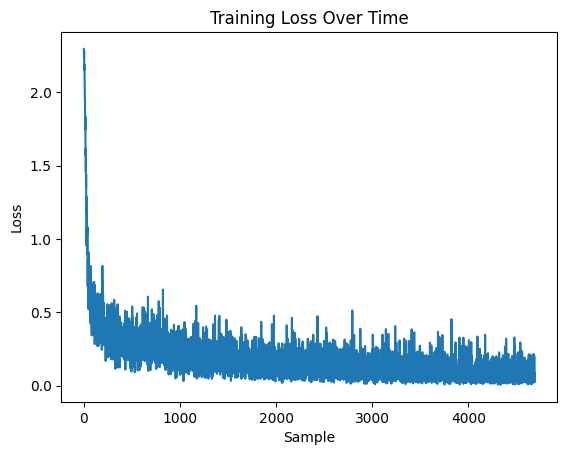

Accuracy of the network on the test images: 96.88%
Accuracy: 96.88%
Precision: 0.9693
Recall: 0.9688
F1-Score: 0.9688


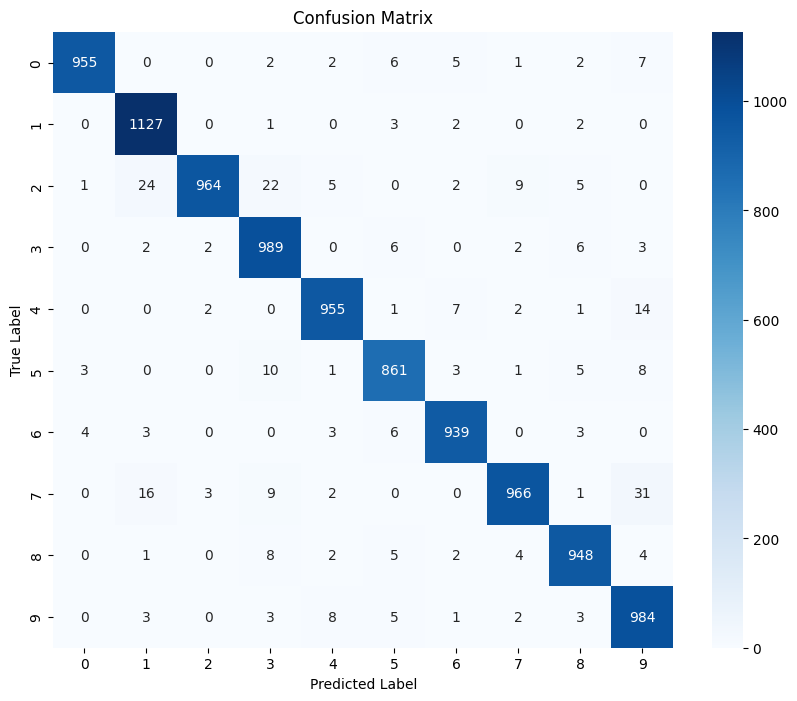

In [7]:
#Step 1: Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# step 2: Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Define the transformations (Normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset to range [-1, 1]
])

#Step 3: Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# Step 4: Define the neural network model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer to 1st hidden layer
        self.fc2 = nn.Linear(128, 64)        # 1st hidden layer to 2nd hidden layer
        self.fc3 = nn.Linear(64, 10)         # 2nd hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = nn.ReLU()(self.fc1(x))  # First fully connected layer with ReLU activation
        x = nn.ReLU()(self.fc2(x))  # Second fully connected layer with ReLU activation
        x = self.fc3(x)  # Output layer
        return x

# Step 5: Initialize the model, loss function, and optimizer
model = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Train the network
num_epochs = 5
ls_losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move images and labels to the device
        images = images.view(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Track the loss
        # ls_losses.append(loss.item())
        ls_losses.append(loss.detach().cpu().numpy())

        # Backpropagation and optimization
        optimizer.zero_grad()  # Zero the gradients
        loss.backward()        # Backward pass
        optimizer.step()       # Update the weights

        # Print the loss every 100 batches
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Step 7: Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel("Sample")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

# Step 8: Testing the model
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []


with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # Move images and labels to the device and flatten the images
        images = images.view(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward pass through the model
        outputs = model(images)

        # Get the predicted class by taking the index with the highest output value
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct count
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Append predictions and actual labels to the lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU for easier handling
        all_labels.extend(labels.cpu().numpy())    # Move to CPU for easier handling

# Calculate and print the accuracy
print(f'Accuracy of the network on the test images: {100 * correct / total}%')

# Step 9: Calculate key performance metrics
# Converted predictions and labels to numpy arrays for metric calculation
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Calculate and visualize the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
